<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Punto_fijo_Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Punto Fijo**

La idea es reemplazar la ecuación $f(x) = 0$ por otra de la forma $x = g(x)$ de manera que la solución de esta sea la solución del problema original. Se comienza con un $x_0$ y se tiene $x_{n+1}=g(x_n)$. 

**Algunas ventajas:**

*   No necesitamos un intervalo para aproximar la solución, solo darle un punto $x_0$.
*   No necesitamos calcular o estimar la derivada de una función.

**Algunas desventajas:**

*   No siempre se podrá resolver resolver $f(x)=0$
*   Puede no ser facil encontrar la $g(x)$ y de haber muchas podría ser complicado encontrar la adecuada.
*   La convergencia depende de $|g'(x)|$.


**Condiciones para convergencia del método:**

*   Necesitamos hallar un intervalo $[a,b]$ tal que:

1.   Exista $0 \leq L < 1$ que cumpla $|g'(x)|\leq L$ en $[a,b]$
2.   $g([a,b])$ $\subseteq$ $[a,b]$










# **Ejercicio**

Sea $f(x) = x^3 - x -1$. La ecuación $f(x)=0$ tiene una única raíz $r$ en $(1,2)$. Consideramos $g(x)=x^3-1$ y $h(x)=\sqrt[3]{x+1}$.



1.   Probar que r es un punto fijo tanto de $g(x)$ como de $h(x)$.
2.   Decidir si $g(x)$ ó $h(x)$ pueden utilizarse para buscar $r$ a través de un método de punto fijo
3.   Utilizar la función adecuada ($g(x)$ ó $h(x)$) y dar $x_0$ valor inicial. Encontrar la cantidad de iteraciones necesarias para aproximar $r$ con error $<10^{-5}$. 





Parte 1: resuelta en el pizarrón. r es punto fijo de g y de h.

Parte 2: Empezamos con $g(x)$

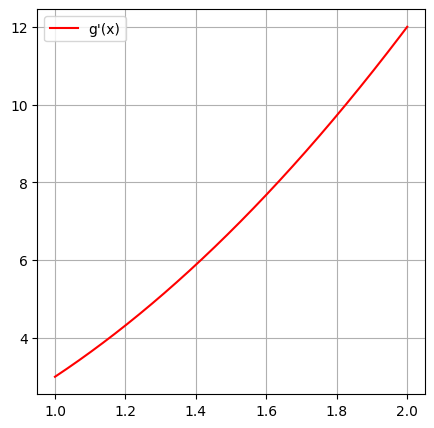

In [ ]:
#La derivada de g(x) es 3*x**2. La graficamos:
import matplotlib.pyplot as plt
import numpy as np

def g_prime(x):
  return 3*x**2

grilla_x=np.linspace(1,2,1000)
plt.figure(figsize=(5,5))
plt.plot(grilla_x, g_prime(grilla_x), label="g'(x)", color="red")
plt.legend()
plt.grid()
plt.show()

Podemos ver que la derivada es mayor a 1, por lo cual el método de punto fijo para g(x) no converge.

Pasamos a estudiar $h(x)$:

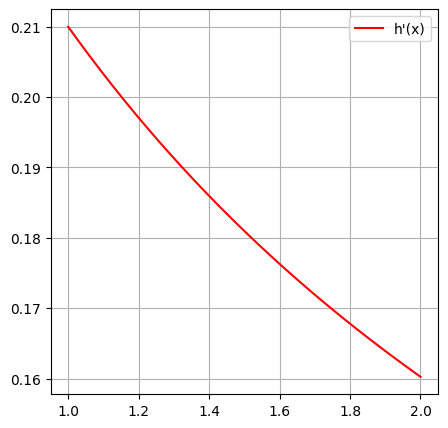

In [ ]:
#La derivada de h(x) es (1/3)*(x+1)**(-2/3). Primero podemos intentar hallar una cota L a mano.
#Luego, la graficamos para corroborar la cota:

h_prime = lambda x: 1/3*(x+1)**(-2/3)

grilla_x=np.linspace(1,2,1000)
plt.figure(figsize=(5,5))
plt.plot(grilla_x, h_prime(grilla_x), label="h'(x)", color="red")
plt.legend()
plt.grid()
plt.show()

$L=0.3$ es una buena cota para cumplir la primera condición.

Ahora queremos ver si se cumple la segunda condición: ¿$h([1,2])\subseteq (1,2)$?

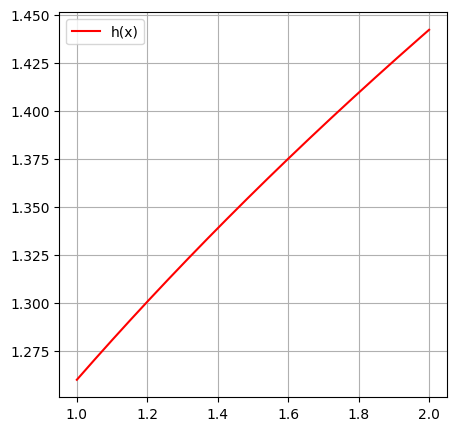

In [ ]:
#Esto se puede resolver de dos formas:
# a. Haciendo análisis de funciones en el intervalo.
# b. Graficando h(x)

def h(x):
  return (x+1)**(1/3)

grilla_x=np.linspace(1,2,1000)
plt.figure(figsize=(5,5))
plt.plot(grilla_x, h(grilla_x), label="h(x)", color="red")
plt.legend()
plt.grid()
plt.show()

Vemos que la condición se cumple. Ahora pasamos a aplicar el método de punto fijo. Recordatorio, hallar $f(x)=0$ es análogo a hallar $h(x)=x$, por lo tanto, queremos ver donde los gráficos de $x$ y $h(x)$ se intersecan:

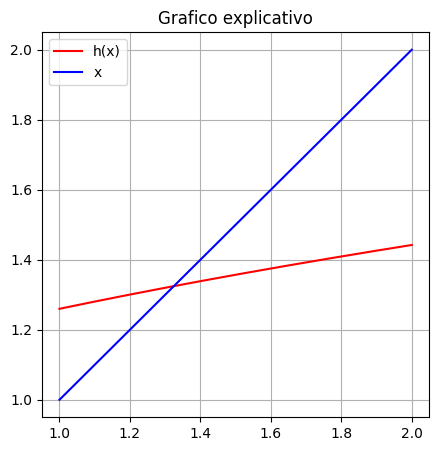

In [ ]:
grilla_x=np.linspace(1,2,1000)
plt.figure(figsize=(5,5))
plt.plot(grilla_x, h(grilla_x), label="h(x)", color="red")
plt.plot(grilla_x, grilla_x, label="x", color="blue")
plt.title("Grafico explicativo")
plt.legend()
plt.grid()
plt.show()

Parte 3: Dar $x_0$ y hallar la cantidad de iteraciones necesarias para que el error sea $<10^{-5}$

In [ ]:
#Vamos a usar un while, y pedir que se hagan iteraciones hasta que la diferencia entre h(x) y x sea pequeña:

x0=1.4 #Definimos el valor inicial
tol=10**(-5)

def punto_fijo(func, x0,tol):
  i=1
  x_old=x0
  while np.abs(x_old-func(x_old))>tol:
    #Completar calculando xnew y pidiendo cambiar x_old por x_new
  return i, x_new

def f(x):
  return x**3 -x -1

punto_fijo(h, x0,tol)

print("La raiz se encuentra en x=" + str(punto_fijo(h, x0,tol)[1]))

print("El método converge en " + str(punto_fijo(h, x0,tol)[0]) + " iteraciones")

La raiz se encuentra en x=1.3247214467836117
El método converge en 7 iteraciones


# **Ejercicio**
### Usar un método de punto fijo para hallar una solución aproximada de $2\sin(x)-x=0$ con un error menor a $10^{-6}$.

In [ ]:
#Completar

# **Método de la Secante**

El método de la secante es similar al método de Newton, la diferencia consiste en que en lugar de usar la recta tangente por el punto donde estamos actualmente, tomamos la recta secante que pasa por los últimos dos puntos obtenidos por el método.

La ecuación de la secante que une los puntos $(x_{n−1}, f(x_{n−1}))$ y $(x_n, f(x_n))$ es $$y = f(x_n) + (x − x_n)\frac{f(x_n) − f(x_{n−1})}{x_n-x_{n-1}}$$

Igualando a $0$ y despejando se tiene $$x_{n+1} = x_n − f(x_n)\frac{x_n − x_{n−1}}{f(x_n)-f(x_{n-1})}$$



# **Ejercicio**

Sea $f(x) = x^3 - x -1$. La ecuación $f(x)=0$ tiene una única raíz $r$ en $(1,2)$. Encontrarla a partir del método de la secante con un error menor a $10^{-5}$.

In [ ]:
#Primeros definimos la función:

def f(x):
  return x**3-x-1

#Queremos que nuestra función tome como input el error, x's iniciales y la funcion a la que le buscamos la raiz

def secante(func, x0,x1,tol):
  x_old=x0 #Xn-2
  x_new=x1 #Xn-1
  i=0
  while np.abs(func(x_new))< tol:
    x_aux= #¡Completar! haciendo una cuenta con x_old y x_new. #Acá calculamos xn (x2 para el primer paso)
    x_old=x_new #Acá le decimos que donde estaba x0 ponga a x1 (en el primer paso)
    x_new=x_aux #Y acá le decimos que donde estaba x1 ponga a x2 (en el primer paso)
    #Luego en el próximo paso usa x1(ahora x_old) y x2(ahora x_new) para calcular x3.. etc.
    i=i+1
  return x_new, func(x_new),i

resultado=secante(f,1.4,1.6,10**(-5))
print("La raiz r es", resultado[0])
print("f(r)=",resultado[1])
print("El numero de iteraciones realizadas es",resultado[2])


La raiz r es 1.324718104049947
f(r)= 6.260703899751974e-07
El numero de iteraciones realizadas es 4


# **Ejercicio**
### Modificar la función del ejercicio anterior para que las iteraciones terminen cuando la diferencia entre $x_{new}$ y $x_{old}$ sea menor a 10^{-4}.

In [ ]:
def secante_bis(to, x0, x1, func):
  #completar


  return x_new, func(x_new), n

# **Ejercicio**
### Implementar una función que aplique el método de la secante para hallar una solución aproximada de $x-0.8-0.2\sin(x)=0$ con un error menor a $10^{-6}$.

In [ ]:
#Completar